### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

The solution can be found by...

Below is the solution using Phthon

In [25]:
#import math
#a=math.sqrt(2)
#b=a
#for n in range(0,100):
#    b=math.pow(a,b)
#print b
import math
exponent = 1
for n in range(0,100):
    exponent = math.sqrt(2)**exponent
print exponent

2.0


### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [40]:
import math
import random as rnd

def headsOrTails(probTails):
    if rnd.random()<probTails:
        return 0  # tils1
    return 1  #heads1

# Auume 0 = tils, 1 heads
firstFlipIsAHeadCounter = 0  #count only trials where first flip is head
secondFlipIsAHeadCounter = 0  #count how many of those had a 2nd head
for trialCtr in range(0,100):
    if rnd.random()<0.5: #reach into bag, and grab either coin
        probTails = 0.6  #heads 40% of the time
    else:
        probTails = 0.4  #heads 60% of the time
    coin = headsOrTails(probTails)   #flip the coin1
    if coin==1:      #it's a head, because it must be 1, not 0
        firstFlipIsAHeadCounter += 1
        secondFlipIsAHeadCounter += headsOrTails(probTails)
probEstimate = float(secondFlipIsAHeadCounter) / firstFlipIsAHeadCounter
print secondFlipIsAHeadCounter, firstFlipIsAHeadCounter
print probEstimate

    

2595 5069
0.511935292957


### 3.1 Object-oriented version

Here we solve the same problem, but introducing objects to Python.

A simplistic approach to OO design is to identify the nouns in the problem description, and consider those to be potential *classes*. A class is a template, sort of like a cookie cutter for stamping out identical objects, ready for use.

In this problem, we see **coin** and **porse** in the problem description. So let's make them into classes.

The *methods* of a class represent the actions we expect of the objects created from the class.

In [11]:
import numpy as np

class Coin(object): #we capitalize the names of classes.
    # almost always define a constructor, so that we can create instances(objects) of Coin:
    def __init__(self,probHeads):
        self.probHeads = probHeads
        
    def flipIsHead(self):
        return np.random.random() < self.probHeads
    
class CoinBag(object):
        def __init__(self):
            self.coins = []
        
        def addCoin(self,coin):
            self.coins.append(coin)
        
        def pickRandomCoin(self):
            return np.random.choice(self.coins)

cb = CoinBag()
cb.addCoin(Coin(0.6))
cb.addCoin(Coin(0.4))

# print cb.pickRandomCoin().probHeads

firstFlipIsAHeadCounter = 0  #count only trials where first flip is head
secondFlipIsAHeadCounter = 0  #count how many of those had a 2nd head
for trialCtr in range(0,100):
    randomCoin = cb.pickRandomCoin()
    if randomCoin.flipIsHead(): 
        firstFlipIsAHeadCounter += 1
        if randomCoin.flipIsHead():
            secondFlipIsAHeadCounter += 1
print float(secondFlipIsAHeadCounter)/firstFlipIsAHeadCounter




    

0.545454545455


### 3.1
In front of you is a jar of 1000 coins. One of the coins has two heads, and the rest are fair coins. You choose a coin at random, and flip it ten times, getting all heads. What is the probability it is one of the fair coins?

In [29]:
cb = CoinBag()

class Coin(object):
    def  __init__(self, probHeads):
        self.probHeads = probHeads
    
    def flipIsHead(self):
        return np.random.random() < self.probHeads
    
    def nextNFlipsAreHeads(self,n):
        for i in range(n):
            if not self.flipIsHead(): # i.e. it's a Tail!
                return False
        return True

class CoinBag(object):
    def __init__(self):
        self.coins = []
        
    def addCoin(self,coin):
        self.coins.append(coin)
    
    def pickRandomCoin(self):
        return np.random.choice(self.coins)
        

cb.addCoin(Coin(1))
#for n in range(999):
#    cb.addCoin(Coin(0.5))
[cb.addCoin(Coin(0.5)) for n in range(999)]

tenFlipsAreHeadsCounter = 0
failCoinCtr = 0

for trialCtr in range(0,10000):
    randomCoin = cb.pickRandomCoin()
    if randomCoin.nextNFlipsAreHeads(10): 
        tenFlipsAreHeadsCounter += 1
        if randomCoin.probHeads < 1:
            failCoinCtr += 1
print float(failCoinCtr)/tenFlipsAreHeadsCounter


0.45


### Monte Hall Problem

You are a contestant on a game show. You have 3 doors in front of you. Behind two of the doors are goats. Unattractive goats. Behind the other door is a brand new Tesla. The game show host asks you to choose a door. After you do, heopens one of the remaining doors, and there stands a goat. The game show host asks you if you'd like to switch doors. What do you do?


### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

In [84]:
import math
import random as rnd
ExpNum=0.0
num=1.0
state=0
for m in range(0,1000):
    num=1.0
    state=0
    for n in range(0,1000):
        rand = rnd.random()
        if state==0:
            num *=1
            state+=1
        elif state==1:
            if rand<=1.0/3:
                num = num/3
                state=state-1
            elif rand>1.0/3:
                num *=2.0/3
                state+=1
        elif state==2:
            if rand<=1.0/3:
                num *=1.0/3
                state +=1
                num=num*(n+1)
                break
            elif rand>1.0/3:
                num *=2.0/3
                state = state-1

    ExpNum+=num
print ExpNum
        
        
    

271.383575664


### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

In [34]:
import numpy as np
class Spinner(object):
    def __init__(self):
        self.total = 0
        self.spinCounter = 0
        
    def spin(self):
        self.total += np.random.random()
        self.spinCounter += 1
    
    def reset(self):
        self.total = 0
        self.spinCounter = 0
    
    def spinUnitilGreaterThanOneAndReset(self):
        while self.total < 1:
            self.spin()
        answer = self.spinCounter
        self.reset()   
        return answer
    
spinner = Spinner()
totalSpins = 0
NumTrials = 100
#for n in range(NumTrials):
#    totalSpins += spinner.spinUnitilGreaterThanOneAndReset()
#print float(totalSpins)/NumTrials
trials = [spinner.spinUnitilGreaterThanOneAndReset() for n in range(NumTrials)]
print trials
print float(sum(trials))/NumTrials
    


[2, 3, 2, 2, 4, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 4, 3, 2, 2, 5, 2, 4, 3, 6, 4, 4, 3, 2, 2, 6, 2, 2, 5, 3, 2, 2, 5, 4, 2, 2, 2, 6, 7, 2, 2, 2, 4, 4, 2, 4, 4, 3, 3, 3, 2, 3, 2, 3, 4, 3, 5, 4, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 4, 2, 5, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2]
2.93


Populating the interactive namespace from numpy and matplotlib


(array([ 0.44,  0.33,  0.14,  0.05,  0.03,  0.01]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 6 Patch objects>)

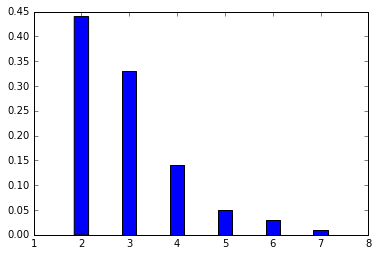

In [36]:
# need next line to get figure to appear in Jupyter
%pylab inline  
import matplotlib.pyplot as plt

numBins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins=numBins, normed=True, align='left',rwidth=0.3, range=(2, 2+numBins))
# plot.grid = True

### 4.4
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?

In [76]:
num=1.0
num=1.0/3
print num

0.333333333333


### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

### 5.10
Suppose there are 36 students in the QFRM program, each assigned a unique integer from 1 to 36. Thirty-six quarters are laid out on a table in a row, heads up. Each student goes to the table, and if they are assigned the number $n$, they turn over the $n$th coin, the $2n$th coin, and so on. So, for example, the student who is assigned 15 will turn over the 15th and 30th coins. When everyone is done, how many tails are showing?